In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
mass2_inel = 204 # gramos
mass1_inel = 200 # gramos
mass1_el = 200 # gramos
mass2_el = 191 #gramos

dmass = 1  #gramos

long1 = 10 #cm
long2 = 10 #cm
dlong = 0.1 #cm

In [15]:
def delta_mu(m1,m2,dmass):
	return (abs(m2/(m1**2)*dmass) + abs(1/m1*dmass))

COLISIÓN ELÁSTICA CON DISTINTOS PESOS

In [16]:

# [mass1_el, mass2_el, t1_i, t2_i, t1_f, t2_f ]
tabla_el = [
	[200, 400+4, 0.272 , 0, 0.908, 0.403 ],
	[200, 400+4, 0.285 , 0, 0.934, 0.443],
	[200, 400+4, 0.294 , 0, 0.948, 0.463 ],

	[200, 350+4, 0.106 +0.01, 0, 0.459, 0.164],
	[200, 350+4, 0.066 , 0, 0.423, 0.101],
	[200, 350+4, 0.104 +0.01 , 0, 0.457, 0.160],



	[200, 300+4, 0.183 , 0, 1.529, 0.236],
	[200, 300+4, 0.147-0.005 , 0, 1.184, 0.193],
	[200, 300+4, 0.157 , 0, 0.886, 0.204],

	[200, 250+4, 0.084 +0.01 , 0, 1.088, 0.106],
	[200, 250+4, 0.097 +0.01, 0, 0.995, 0.122],
	[200, 250+4, 0.101 +0.005, 0, 1.072, 0.126],
		 ]
tabla_el = np.array(tabla_el)


Nótese que sólo se recogen datos desde x 1.3 hasta 2, esto se debe a que los datos recogidos durante el experimento en relacciones de masa \( \frac{m2}{m1} <= 1 \) la masa 1 se quedaba completamente detenida tras chocar a la masa 2, sin retroceder. Esto puede deberse a un error experimental debido a la presencia de rozamiento durante el experimento, la solución a este problema podría ser lubricar la superficie en la que las masas se desplazan.

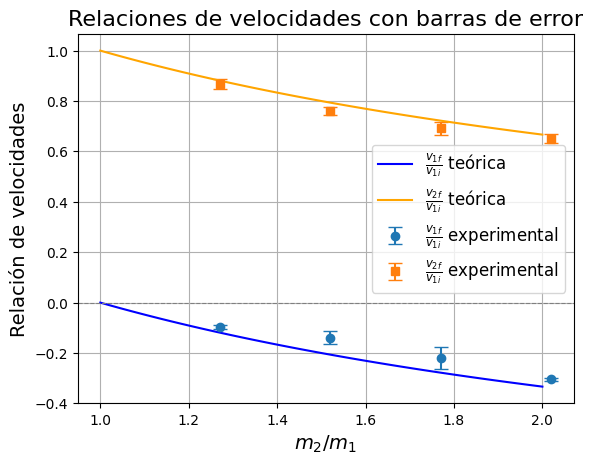

In [17]:
v_1_i = long1 / tabla_el[:, 2]
v_1_f = -long1 / tabla_el[:, 4]
v_2_f = long2 / tabla_el[:, 5]
v1f_v1i = v_1_f / v_1_i
v2f_v1i = v_2_f / v_1_i

# Cálculo de m2/m1 y su error
m2_m1 = tabla_el[:, 1] / tabla_el[:, 0]
m2_m1_error = delta_mu(tabla_el[:, 1], tabla_el[:, 0], dmass)

# Agrupar datos únicos para m2/m1
unique_m2_m1 = np.unique(m2_m1)
mean_v1f_v1i = []
std_v1f_v1i = []
mean_v2f_v1i = []
std_v2f_v1i = []
mean_m2_m1 = []
std_m2_m1 = []

# Calculando la media y desviación estándar para cada valor único de m2/m1
for val in unique_m2_m1:
    indices = m2_m1 == val
    mean_v1f_v1i.append(np.mean(v1f_v1i[indices]))
    std_v1f_v1i.append(np.std(v1f_v1i[indices]))
    mean_v2f_v1i.append(np.mean(v2f_v1i[indices]))
    std_v2f_v1i.append(np.std(v2f_v1i[indices]))
    
    # Calculando la media y el error de m2/m1
    mean_m2_m1.append(np.mean(m2_m1[indices]))
    std_m2_m1.append(np.std(m2_m1[indices]))

# Convertimos las listas en arrays para graficar
mean_v1f_v1i = np.array(mean_v1f_v1i)
std_v1f_v1i = np.array(std_v1f_v1i) 
mean_v2f_v1i = np.array(mean_v2f_v1i)
std_v2f_v1i = np.array(std_v2f_v1i)
mean_m2_m1 = np.array(mean_m2_m1)
std_m2_m1 = np.array(std_m2_m1)

# Relaciones teóricas para comparación
m2_m1_x = np.linspace(1, 2, 100)
v1f_v1i_teorica = (1 - m2_m1_x) / (1 + m2_m1_x)
v2f_v1i_teorica = 2 / (1 + m2_m1_x)

# Graficamos los promedios con barras de error
plt.errorbar(mean_m2_m1, mean_v1f_v1i, yerr=std_v1f_v1i, fmt='o', label=r"$\frac{v_{1f}}{v_{1i}}$ experimental", capsize=5)
plt.errorbar(mean_m2_m1, mean_v2f_v1i, yerr=std_v2f_v1i, fmt='s', label=r"$\frac{v_{2f}}{v_{1i}}$ experimental", capsize=5)

# Graficamos las relaciones teóricas
plt.plot(m2_m1_x, v1f_v1i_teorica, label=r"$\frac{v_{1f}}{v_{1i}}$ teórica", color="Blue")
plt.plot(m2_m1_x, v2f_v1i_teorica, label=r"$\frac{v_{2f}}{v_{1i}}$ teórica", color="orange")

# Etiquetas y formato
plt.xlabel(r'$m_2/m_1$', fontsize=14)
plt.ylabel('Relación de velocidades', fontsize=14)
plt.title('Relaciones de velocidades con barras de error', fontsize=16)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend(fontsize=12)
plt.grid()
plt.show()

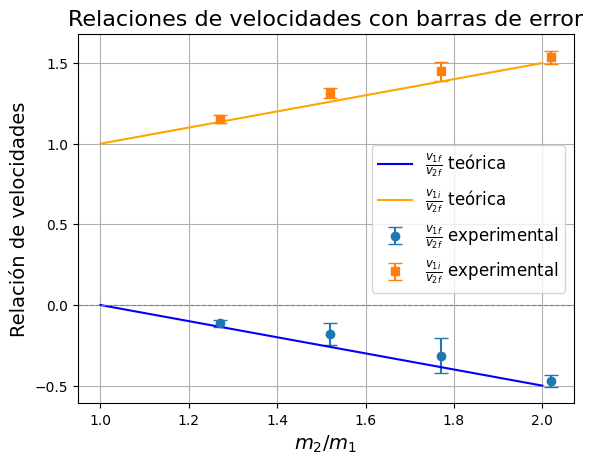

In [18]:
v_1_i = long1 / tabla_el[:, 2]
v_1_f = -long1 / tabla_el[:, 4]
v_2_f = long2 / tabla_el[:, 5]

v1f_v2f = v_1_f / v_2_f
v1i_v2f = v_1_i / v_2_f

m2_m1 = tabla_el[:, 1] / tabla_el[:, 0]

# Agrupamos datos únicos para m2/m1
unique_m2_m1 = np.unique(m2_m1)
mean_v1f_v2f = []
std_v1f_v2f = []
mean_v1i_v2f = []
std_v1i_v2f = []

# Calculamos la media y desviación estándar para cada m2/m1
for val in unique_m2_m1:
    indices = m2_m1 == val
    mean_v1f_v2f.append(np.mean(v1f_v2f[indices]))
    std_v1f_v2f.append(np.std(v1f_v2f[indices]))
    mean_v1i_v2f.append(np.mean(v1i_v2f[indices]))
    std_v1i_v2f.append(np.std(v1i_v2f[indices]))

# Convertimos las listas en arrays para graficar
mean_v1f_v2f = np.array(mean_v1f_v2f)
std_v1f_v2f = np.array(std_v1f_v2f)*2
mean_v1i_v2f = np.array(mean_v1i_v2f)
std_v1i_v2f = np.array(std_v1i_v2f)

# Relaciones teóricas para comparación
m2_m1_x = np.linspace(1, 2, 100)
v1f_v2f_teorica = (1 - m2_m1_x) / 2
v1i_v2f_teorica = (1 + m2_m1_x) / 2

# Graficamos los promedios con barras de error
plt.errorbar(unique_m2_m1, mean_v1f_v2f, yerr=std_v1f_v2f, fmt='o', label=r"$\frac{v_{1f}}{v_{2f}}$ experimental", capsize=5)
plt.errorbar(unique_m2_m1, mean_v1i_v2f, yerr=std_v1i_v2f, fmt='s', label=r"$\frac{v_{1i}}{v_{2f}}$ experimental", capsize=5)

# Graficamos las relaciones teóricas
plt.plot(m2_m1_x, v1f_v2f_teorica, label=r"$\frac{v_{1f}}{v_{2f}}$ teórica", color="Blue")
plt.plot(m2_m1_x, v1i_v2f_teorica, label=r"$\frac{v_{1i}}{v_{2f}}$ teórica", color="orange")

# Etiquetas y formato
plt.xlabel(r'$m_2/m_1$', fontsize=14)
plt.ylabel('Relación de velocidades', fontsize=14)
plt.title('Relaciones de velocidades con barras de error', fontsize=16)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend(fontsize=12)
plt.grid()
plt.show()

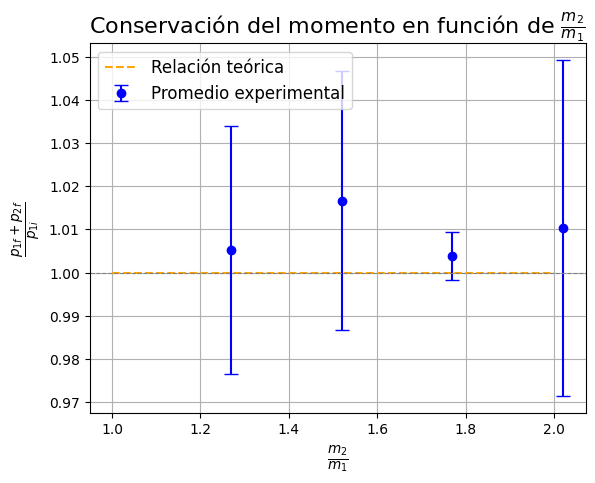

In [19]:

# Datos teóricos
mu_teo = np.linspace(1, 2, 100)  # Valores teóricos de mu (m2/m1)
p1f_p2f_pi_teo = np.ones_like(mu_teo)  # Relación teórica siempre es 1

# Datos experimentales
p1_f = tabla_el[:, 0] * v_1_f
p2_f = tabla_el[:, 1] * v_2_f
p1_i = tabla_el[:, 0] * v_1_i
p1f_p2f_pi_exp = (p1_f + p2_f) / p1_i
m2_m1 = tabla_el[:, 1] / tabla_el[:, 0]

# Agrupación por valores únicos de mu
unique_mu = np.unique(m2_m1)
mean_p1f_p2f_pi = []
std_p1f_p2f_pi = []

for mu in unique_mu:
    indices = m2_m1 == mu  # Índices para el valor actual de mu
    mean_p1f_p2f_pi.append(np.mean(p1f_p2f_pi_exp[indices]))
    std_p1f_p2f_pi.append(np.std(p1f_p2f_pi_exp[indices]))

# Convertimos listas a arrays
mean_p1f_p2f_pi = np.array(mean_p1f_p2f_pi)
std_p1f_p2f_pi = np.array(std_p1f_p2f_pi)

# Graficar relación teórica
plt.plot(mu_teo, p1f_p2f_pi_teo, label='Relación teórica', linestyle='--', color='orange')

# Graficar promedios con barras de error
plt.errorbar(unique_mu, mean_p1f_p2f_pi, yerr=std_p1f_p2f_pi, fmt='o', label='Promedio experimental', capsize=5, color='blue')

# Etiquetas y formato
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel(r'$\frac{p_{1f} + p_{2f}}{p_{1i}}$', fontsize=14)
plt.title(r'Conservación del momento en función de $\frac{m_2}{m_1}$', fontsize=16)
plt.axhline(1, color='gray', linewidth=0.8, linestyle='--')  # Línea en y=1 para referencia
plt.legend(fontsize=12)
plt.grid()
plt.show()


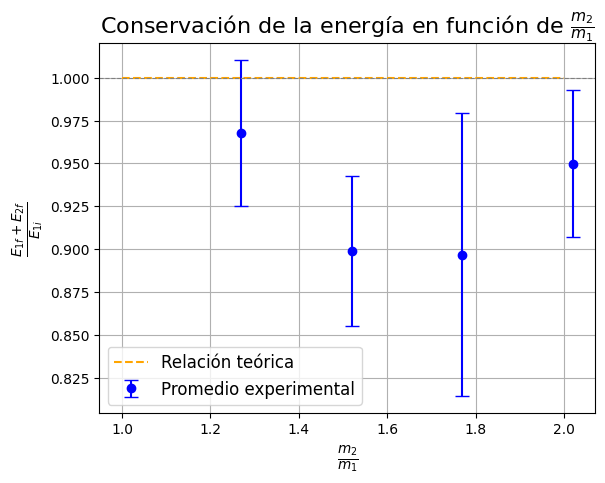

In [20]:

# Relación teórica para la energía
mu_teo = np.linspace(1, 2, 100)
energy_ratio_teo = ((1 - mu_teo)**2 + 4 * mu_teo) / (1 + mu_teo)**2

# Energías experimentales
E_1f = 0.5 * tabla_el[:, 0] * v_1_f**2
E_2f = 0.5 * tabla_el[:, 1] * v_2_f**2
E_1i = 0.5 * tabla_el[:, 0] * v_1_i**2
energy_ratio_exp = (E_1f + E_2f) / E_1i

# Agrupación por valores únicos de mu
unique_mu = np.unique(m2_m1)
mean_energy_ratio = []
std_energy_ratio = []

for mu in unique_mu:
    indices = m2_m1 == mu  # Índices para el valor actual de mu
    mean_energy_ratio.append(np.mean(energy_ratio_exp[indices]))
    std_energy_ratio.append(np.std(energy_ratio_exp[indices]))

# Convertimos listas a arrays
mean_energy_ratio = np.array(mean_energy_ratio)
std_energy_ratio = np.array(std_energy_ratio)

# Graficar relación teórica
plt.plot(mu_teo, energy_ratio_teo, label='Relación teórica', linestyle='--', color='orange')

# Graficar promedios con barras de error
plt.errorbar(unique_mu, mean_energy_ratio, yerr=std_energy_ratio, fmt='o', label='Promedio experimental', capsize=5, color='blue')

# Etiquetas y formato
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel(r'$\frac{E_{1f} + E_{2f}}{E_{1i}}$', fontsize=14)
plt.title(r'Conservación de la energía en función de $\frac{m_2}{m_1}$', fontsize=16)
plt.axhline(1, color='gray', linewidth=0.8, linestyle='--')  # Línea en y=1 para referencia
plt.legend(fontsize=12)
plt.grid()
plt.show()


Error relativo

In [21]:

errores_relativos = np.abs((mean_energy_ratio - 1) / 1) * 100

# Promedio y desviación estándar del error relativo
error_relativo_promedio = np.mean(errores_relativos)
desviacion_estandar_error = np.std(errores_relativos)

# Mostrar resultados
print(f"Errores relativos individuales Energía: {errores_relativos}")
print(f"Error relativo promedio Energía: {error_relativo_promedio:.2f}%")
print(f"Desviación estándar del error relativo Energía: {desviacion_estandar_error:.2f}%")





errores_relativos = np.abs((mean_p1f_p2f_pi - 1) / 1) * 100

# Promedio y desviación estándar del error relativo
error_relativo_promedio = np.mean(errores_relativos)
desviacion_estandar_error = np.std(errores_relativos)

# Mostrar resultados
print(f"Errores relativos individuales momento: {errores_relativos}")
print(f"Error relativo promedio momento: {error_relativo_promedio:.2f}%")
print(f"Desviación estándar del error relativo momento: {desviacion_estandar_error:.2f}%")

Errores relativos individuales Energía: [ 3.22459896 10.09436311 10.32204157  5.00809667]
Error relativo promedio Energía: 7.16%
Desviación estándar del error relativo Energía: 3.11%
Errores relativos individuales momento: [0.52254094 1.66568512 0.38350828 1.02587228]
Error relativo promedio momento: 0.90%
Desviación estándar del error relativo momento: 0.50%


#   COLISIÓN INELÁSTICA

In [22]:
# [mass1_el, mass2_el, t1_i, t2_f ]

tabla_inel = [
	[200, 400-10, 0.194 , 0, 0.569 ],
	[200, 400-10, 0.192 , 0, 0.571],

	[200, 300-10, 0.145 , 0, 0.359],
	[200, 300-10, 0.142, 0,0.359],
	
	[200, 200-10, 0.240, 0, 0.449],
	[200, 200-10, 0.197, 0, 0.393],

	[300, 200-10, 0.161, 0, 0.276],
	[300, 200-10, 0.333, 0, 0.530],

	[400, 200-10, 0.234, 0, 0.344],
	[400, 200-10, 0.216, 0, 0.328],
	]
tabla_inel = np.array(tabla_inel)


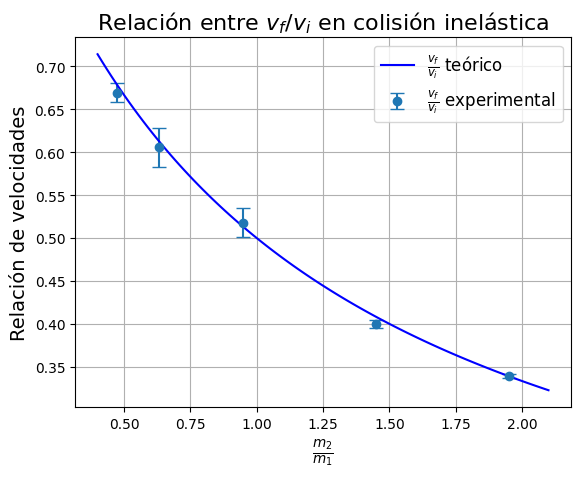

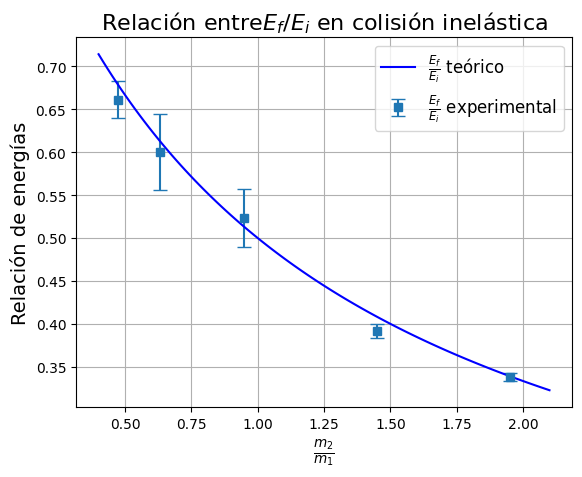

In [23]:
# Asumiendo que ya tienes tus datos en tabla_inel
v_i = long1 / tabla_inel[:, 2]
v_f = long2 / tabla_inel[:, 4]
vf_vi = v_f / v_i

E_i = tabla_inel[:, 0] * 0.5 * v_i**2
E_f = (tabla_inel[:, 0] + tabla_inel[:, 1]) * 0.5 * v_f**2
E_f_E_i = E_f / E_i
m2_m1 = tabla_inel[:, 1] / tabla_inel[:, 0]

# Agrupar datos por m2/m1
unique_m2_m1 = np.unique(m2_m1)
mean_vf_vi = []
std_vf_vi = []
mean_E_f_E_i = []
std_E_f_E_i = []

# Calcular media y desviación estándar para cada grupo
for val in unique_m2_m1:
    indices = m2_m1 == val
    mean_vf_vi.append(np.mean(vf_vi[indices]))
    std_vf_vi.append(np.std(vf_vi[indices]))
    mean_E_f_E_i.append(np.mean(E_f_E_i[indices]))
    std_E_f_E_i.append(np.std(E_f_E_i[indices]))

# Convertir listas a arrays para graficar
mean_vf_vi = np.array(mean_vf_vi)
std_vf_vi = np.array(std_vf_vi)
mean_E_f_E_i = np.array(mean_E_f_E_i)
std_E_f_E_i = np.array(std_E_f_E_i)
# Graficar la relación teórica
x = np.linspace(0.4, 2.1, 100)
y = 1 / (1 + x)
# Graficar la relación de velocidades y energía
plt.errorbar(unique_m2_m1, mean_vf_vi, yerr=std_vf_vi, fmt='o', label=r"$\frac{v_f}{v_i}$ experimental", capsize=5)
plt.plot(x, y, '-', label=r"$\frac{v_f}{v_i}$ teórico", color ="Blue")
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel('Relación de velocidades', fontsize=14)
plt.title('Relación entre $v_f/v_i$ en colisión inelástica', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.errorbar(unique_m2_m1, mean_E_f_E_i, yerr=std_E_f_E_i, fmt='s', label=r"$\frac{E_f}{E_i}$ experimental", capsize=5)
plt.plot(x, y, '-', label=r"$\frac{E_f}{E_i}$ teórico", color = "Blue")

# Etiquetas y formato
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel('Relación de energías', fontsize=14)
plt.title('Relación entre$E_f/E_i$ en colisión inelástica', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


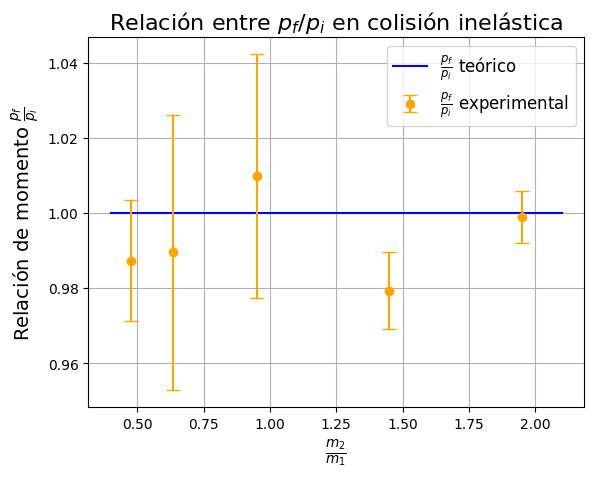

Errores relativos para cada punto: [1.26577567 1.04979036 0.98985872 2.06824513 0.11281968]
Error relativo promedio: 1.0972979087219836


In [24]:
# Graficar las relaciones teóricas
x = np.linspace(0.4, 2.1, 100)
y = np.ones_like(x)  # Relación teórica siempre es 1
# Esta es la relación teórica para p_f / p_i

# Calcular p_i y p_f a partir de los datos experimentales
p_i = tabla_inel[:, 0] * v_i
p_f = (tabla_inel[:, 0] + tabla_inel[:, 1]) * v_f
p_f_p_i = p_f / p_i


# Calcular la media y la desviación estándar para cada valor único de m2/m1
m2_m1_unicos = np.unique(m2_m1)
medias = []
desviaciones = []

for valor in m2_m1_unicos:
    indices = np.where(m2_m1 == valor)  # Encontrar índices donde m2/m1 coincide
    valores = p_f_p_i[indices]  # Valores de p_f/p_i para ese m2/m1
    medias.append(np.mean(valores))  # Calcular media
    desviaciones.append(np.std(valores))  # Calcular desviación estándar

# Convertir a arrays para graficar
medias = np.array(medias)
desviaciones = np.array(desviaciones)

# Graficar la relación teórica y experimental con barras de error
plt.plot(x, y, label=r"$\frac{p_f}{p_i}$ teórico", color="blue")
plt.errorbar(m2_m1_unicos, medias, yerr=desviaciones, fmt='o', 
             label=r"$\frac{p_f}{p_i}$ experimental", color="orange", capsize=5)

# Etiquetas y formato
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel(r'Relación de momento $\frac{p_f}{p_i}$', fontsize=14)
plt.title('Relación entre $p_f/p_i$ en colisión inelástica', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Cálculo del error relativo para cada punto
errores_relativos = np.abs((medias - 1) / 1) * 100

# Cálculo del error relativo promedio
error_relativo_promedio = np.mean(errores_relativos)

# Mostrar resultados
print("Errores relativos para cada punto:", errores_relativos)
print("Error relativo promedio:", error_relativo_promedio)


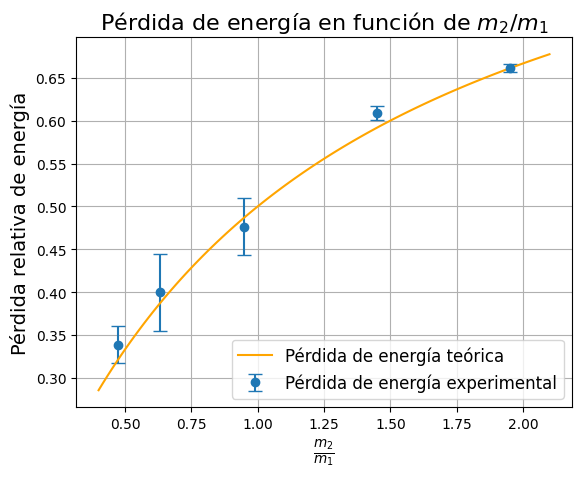

In [25]:
# Calcular la pérdida de energía relativa
energia_perdida = 1 - E_f_E_i  # Donde E_f_E_i = E_f / E_i calculado previamente

# Relación teórica de pérdida de energía
x = np.linspace(0.4, 2.1, 100)
y = 1 - (1 / (1 + x))  # Teórica: 1 - E_f/E_i = 1 - (1 / (1 + m2/m1))


# Agrupar datos por m2/m1
unique_m2_m1 = np.unique(m2_m1)
mean_energia_perdida = []
std_energia_perdida = []

# Calcular media y desviación estándar para cada grupo
for val in unique_m2_m1:
    indices = m2_m1 == val
    mean_energia_perdida.append(np.mean(energia_perdida[indices]))
    std_energia_perdida.append(np.std(energia_perdida[indices]))

# Convertir listas a arrays para graficar
mean_energia_perdida = np.array(mean_energia_perdida)
std_energia_perdida = np.array(std_energia_perdida)

# Graficar la pérdida de energía en función de m2/m1 con barras de error
plt.errorbar(unique_m2_m1, mean_energia_perdida, yerr=std_energia_perdida, fmt='o', 
             label="Pérdida de energía experimental", capsize=5)

# Relación teórica de pérdida de energía
x = np.linspace(0.4, 2.1, 100)
y = 1 - (1 / (1 + x))  # Teórica: 1 - E_f/E_i = 1 - (1 / (1 + m2/m1))
plt.plot(x, y, '-', label="Pérdida de energía teórica", color="orange")

# Etiquetas y formato
plt.xlabel(r'$\frac{m_2}{m_1}$', fontsize=14)
plt.ylabel('Pérdida relativa de energía', fontsize=14)
plt.title('Pérdida de energía en función de $m_2/m_1$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

